---
layout: exercises
chapter: 8
chapter-title: Dimensionality Reduction
permalink: /ml-book/chapter8/exercises.html
---

## Exercise 1
The primary motivation for dimensionality reduction is that it decreases the training time of learning algorithms. It can help reduce overfitting and enable machine learning approaches to generalize better. Also, it can help simplify data for visualization or analysis. The main drawbacks is that there is always some data loss under dimensionality reduction. 

## Exercise 2
The curse of dimensionality refers to the fact that higher dimensional datasets are sparse. When training instances are far from each other then it becomes more difficult for an machine learning approach to predict new instances. 

## Exercise 3
Yes, it is possible to reverse the dimensionality reduction operation by performing the inverse transformation. There is some fidelity lost and this is known as the reconstruction error. For kPCA, a pre-image enables us to approximate the reconstruction error. Some algorithms don't have this.

## Exercise 4
No, PCA can't be used to reduce the dimensionality of the highly nonlinear dataset, other algorithms such as kPCA or LLE are more effective. Think Swiss roll. It can however, get rid of useless higher dimensions.

## Exercise 5
It depends how complex the data is. It's possible the 95% of the dimensions contain very little variance so that only a few dimensions would be needed to account for the overall variance. 

## Exercise 6
* Vanilla PCA - When data lies close to a hyper plane (linear) in a lower dimension
* Incremental PCA - When you want to use PCA, but training data doesn't fit into memory
* Randomized PCA - When you have a large number of dimensions to start with and you want to quickly approximate a small number of principal components to reduce to
* Kernel PCA - When data lies close to a non-linear manifold in a lower dimension

## Exercise 7
Performance of a dimensionality reduction algorithm can be evaluated by calculating the reconstruction error (the error from original data to the inversed transformation data) and also through grid search with the final predictions.

## Exercise 8
Yes, you can use PCA (or Randomized PCA ) to quickly reduce the number of dimensions and then kPCA or another algorithm to further reduce the dimensionality.

## Exercise 9
Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances from training, and the remaining 10,000 for testing). Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous dataset?

In [5]:
# From chapter 3:
from sklearn.datasets import fetch_openml
import numpy as np

# MNIST changed to https://www.openml.org/d/554
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [6]:
from sklearn.model_selection import train_test_split

X, y = mnist["data"], mnist["target"]
print(len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10_000)

print(X_train.shape, X_test.shape)

70000
(60000, 784) (10000, 784)


In [7]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

In [8]:
import time

st = time.time()
rfc.fit(X_train, y_train)
print(f"rfc done: {round(time.time() - st, 3)}")

rfc done: 46.209


In [9]:
rfc.score(X_test, y_test)

0.9699

So it took 46 seconds before doing PCA. And it scored 97% on the test set.

In [13]:
from sklearn.decomposition import PCA

rfc = RandomForestClassifier(random_state=42)
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [14]:
import time

st = time.time()
rfc.fit(X_train_reduced, y_train)
print(f"rfc after PCA done: {round(time.time() - st, 3)}")

rfc after PCA done: 95.308


In [15]:
rfc.score(X_test_reduced, y_test)

0.9479

So it took 95 seconds after doing PCA and the performance was worse (97% --> 94.8%). I guess for other types of ML algorithms it might provide benefit :).

## Exercise 9
Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to represent each image's target class. Alternatively, you can write colored digits at the location of each instance, or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sample or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_test_reduced = tsne.fit_transform(X_test)
print(X_test_reduced.shape)

/Users/riley/PycharmProjects/ML/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/riley/PycharmProjects/ML/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(10000, 2)


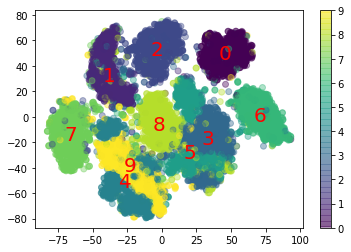

In [32]:
import matplotlib.pyplot as plt


plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test.astype(int), alpha=0.4)
plt.colorbar()

# Annotate nicely
for i in range(10):
    x_med, y_med = (
        X_test_reduced[y_test.astype(int) == i][:, 0],
        X_test_reduced[y_test.astype(int) == i][:, 1],
    )
    x_med, y_med = np.median(x_med), np.median(y_med)
    plt.text(
        x_med,
        y_med,
        str(i),
        horizontalalignment="center",
        verticalalignment="center",
        color="red",
        fontsize=20,
    )
plt.title("TSNE")

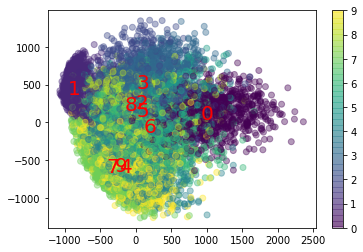

In [33]:
pca = PCA(n_components=2)
X_test_reduced = pca.fit_transform(X_test)
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test.astype(int), alpha=0.4)
plt.colorbar()
for i in range(10):
    x_med, y_med = (
        X_test_reduced[y_test.astype(int) == i][:, 0],
        X_test_reduced[y_test.astype(int) == i][:, 1],
    )
    x_med, y_med = np.median(x_med), np.median(y_med)
    plt.text(
        x_med,
        y_med,
        str(i),
        horizontalalignment="center",
        verticalalignment="center",
        color="red",
        fontsize=20,
    )
plt.title("PCA")

Text(0.5, 1.0, 'LLE')

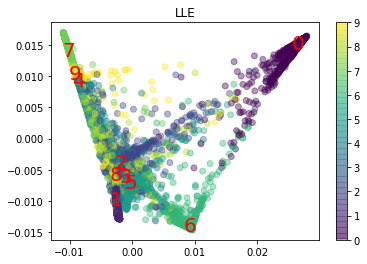

In [34]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2)
X_test_reduced = lle.fit_transform(X_test)
plt.scatter(X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test.astype(int), alpha=0.4)
plt.colorbar()
for i in range(10):
    x_med, y_med = (
        X_test_reduced[y_test.astype(int) == i][:, 0],
        X_test_reduced[y_test.astype(int) == i][:, 1],
    )
    x_med, y_med = np.median(x_med), np.median(y_med)
    plt.text(
        x_med,
        y_med,
        str(i),
        horizontalalignment="center",
        verticalalignment="center",
        color="red",
        fontsize=20,
    )
plt.title("LLE")

Text(0.5, 1.0, 'MDS')

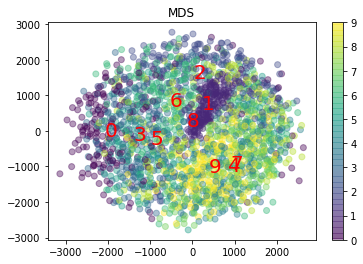

In [36]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X_test_reduced = mds.fit_transform(X_test[:2000])
plt.scatter(
    X_test_reduced[:, 0], X_test_reduced[:, 1], c=y_test[:2000].astype(int), alpha=0.4
)
plt.colorbar()
for i in range(10):
    x_med, y_med = (
        X_test_reduced[y_test[:2000].astype(int) == i][:, 0],
        X_test_reduced[y_test[:2000].astype(int) == i][:, 1],
    )
    x_med, y_med = np.median(x_med), np.median(y_med)
    plt.text(
        x_med,
        y_med,
        str(i),
        horizontalalignment="center",
        verticalalignment="center",
        color="red",
        fontsize=20,
    )
plt.title("MDS")

So we can see that t-SNE did the best at dimensionality reduction to 2D for MNIST.